In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, f1_score, balanced_accuracy_score, accuracy_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pickle
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
from sklearn.linear_model import SGDClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer

In [2]:
#***** Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")

full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == '01').astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 1

In [5]:
#***** Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")

full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == 1).astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 2


/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#***** Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")


full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == '01').astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 3
*****_features

In [9]:
#***** Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")

full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == '01').astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 4

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
#***** Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")

full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == '01').astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 5

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#Nevada Features
STATE = "*****"
init_opioid_features = pd.read_csv(STATE + "/init_opioid_features.csv")
dx_features = pd.read_csv(STATE + "/dx_features.csv")
eligibility_features = pd.read_csv(STATE + "/eligibility_features.csv")
pre_common_features = pd.read_csv(STATE + "/pre_common_features.csv")
pre_rx_features = pd.read_csv(STATE + "/pre_rx_features.csv")
dx_filter_init_feature = pd.read_csv(STATE + "/dx_filter_init_feature.csv")

full_features = init_opioid_features.merge(dx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(eligibility_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_common_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(pre_rx_features.drop("OUTCOME",axis = 1), how = "left", left_on = "MA_NUM", right_on = "MA_NUM")
full_features = full_features.merge(dx_filter_init_feature, how = "left", left_on = "MA_NUM", right_on = "MA_NUM")

dx_columns = dx_features.drop(["OUTCOME","MA_NUM"],axis = 1).columns.append(dx_filter_init_feature.drop(["MA_NUM"],axis = 1).columns)
full_features.loc[:,dx_columns] = full_features.loc[:,dx_columns].fillna(0).astype(bool)

full_features = full_features.loc[full_features.ELIGIBILITY_TIME > 30*2]

pickle_in = open(STATE + "/opioid_naive_info_known","rb")
opioid_naive_info_known = pickle.load(pickle_in)

full_features.loc[:,"Hispanic"] = (full_features.ETHNICITY == '01').astype(float)

matrix_features = full_features.drop(["MA_NUM","CLAIM_ID","Generic_Drug_Name","FIPS",'ETHNICITY','LANGUAGE','INITIAL_PREG_IND','PREVIOUSLY_PREGNANT'],axis = 1)

*****_features = pd.get_dummies(matrix_features, columns = ['DEAClassCode','INITIAL_CLAIM_TYPE','INITIAL_PLACE_OF_SERVICE','PROVIDER_TYPE','PROVIDER_SPECIALTY','PROVIDER_FILE_TYPE','Drug','LongShortActing','Master_Form',"GENDER"])
*****_features.loc[:,'STATE'] = 6

In [15]:
total_features = pd.concat([*****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index'),
                            *****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index'),
                            *****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index'),
                            *****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index'),
                            *****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index'),
                            *****_features.sample(n = 30000,replace = True, random_state = 42,axis = 'index')])

In [16]:
overlap = set(*****_features.columns).intersection(set(*****_features.columns),set(*****_features.columns),set(*****_features.columns),set(*****_features.columns),set(*****_features.columns))
total_features = total_features.loc[:,overlap]

In [17]:
len(overlap)

171

In [20]:
#remove any feautures that are present in <= 1% of records
total_features = total_features.loc[:,total_features.fillna(0).mean() > .01]

In [21]:
total_features.shape

(180000, 112)

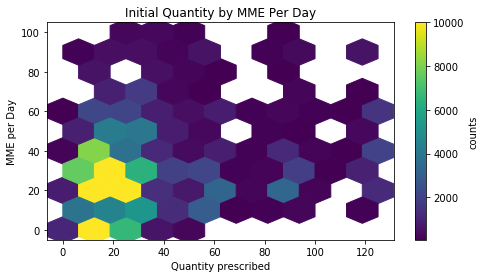

In [43]:

fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
hb = ax.hexbin( stat_matrix.INITIAL_RX_QUANTITY, stat_matrix.MED,
          mincnt = 50,
          extent = (0,125,0,100),
          gridsize = 10,
          vmax = 10000)
ax.set_title("Initial Quantity by MME Per Day")
ax.set_ylabel("MME per Day")
ax.set_xlabel("Quantity prescribed")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')


plt.show()

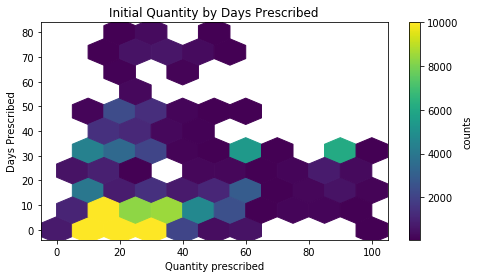

In [44]:

fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
hb = ax.hexbin(stat_matrix.INITIAL_RX_QUANTITY, stat_matrix.INITIAL_RX_LENGTH, 
          mincnt = 50,
          extent = (0,100,0,80),
          gridsize = 10,
          vmax = 10000)
ax.set_title("Initial Quantity by Days Prescribed")
ax.set_ylabel("Days Prescribed")
ax.set_xlabel("Quantity prescribed")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')


plt.show()

# Modeling sets

In [34]:
#leaving out ***** for full val set
fifth_val = total_features.loc[total_features.STATE == 2]
total_features = total_features.loc[total_features.STATE != 2]

In [35]:
train, test = train_test_split(total_features, stratify = total_features.OUTCOME,test_size=0.2)

In [36]:
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_train = pd.DataFrame(fill_NaN.fit_transform(train))
imputed_train.columns = train.columns
imputed_train.index = train.index
train = imputed_train

imputed_test = pd.DataFrame(fill_NaN.transform(test))
imputed_test.columns = test.columns
imputed_test.index = test.index
test = imputed_test

imputed_fifth_val = pd.DataFrame(fill_NaN.transform(fifth_val))
imputed_fifth_val.columns = fifth_val.columns
imputed_fifth_val.index = fifth_val.index
fifth_val = imputed_fifth_val


# Training

In [37]:
x_train = train.drop('OUTCOME',axis = 1)
y_train = train.OUTCOME

In [38]:
scalar = preprocessing.StandardScaler()

In [40]:
numeric_columns = ['MED','INITIAL_RX_AMOUNT_BILLED','INITIAL_RX_AMOUNT_PAID','INITIAL_RX_QUANTITY','INITIAL_RX_LENGTH','AGE','TOTAL_PRE_CLAIMS','PRE_NUM_POLYPHARMACY','TOTAL_RXS','PRE_RX_BILLED_SUM','PRE_RX_PAID_SUM','PRE_RX_BILLED_AVG','PRE_RX_PAID_AVG','PRE_RX_QTY_AVG','PRE_RX_DAYS_AVD','PRE_RX_QTY_SUM','PRE_RX_DAYS_SUM', "Rural_urban_continuum_code_2013","Urban_influence_code_2013","Unemployment_rate_2018","Median_Household_Income_2018","Med_HH_Income_Percent_of_State_Total_2018","PCTPOVALL_2018","Percent_less_than_high_school_1418","Percent_only_high_school_1418","Percent_some_college_1418","Percent_bachelors_or_higher_1418","ELIGIBILITY_TIME"]

In [41]:
scalar.fit(x_train.loc[:,numeric_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
x_train.loc[:,numeric_columns] = scalar.transform(x_train.loc[:,numeric_columns])

# Testing

In [43]:
x_test = test.drop('OUTCOME',axis = 1).astype(float)
y_test = test.OUTCOME

In [44]:
x_test.loc[:,numeric_columns] = scalar.transform(x_test.loc[:,numeric_columns])

# Validating

In [45]:
x_val = fifth_val.drop('OUTCOME',axis = 1).astype(float)
y_val = fifth_val.OUTCOME

In [46]:
x_val.loc[:,numeric_columns] = scalar.transform(x_val.loc[:,numeric_columns])

# PCA to logistic regression

In [47]:
pca = PCA(n_components=10)

In [48]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
print(pca.explained_variance_ratio_)

[0.44161384 0.22997719 0.21634598 0.02246298 0.01492212 0.00895831
 0.00772307 0.00603872 0.00517195 0.00426225]


In [50]:
pca_train = pca.transform(x_train)

### Visualize

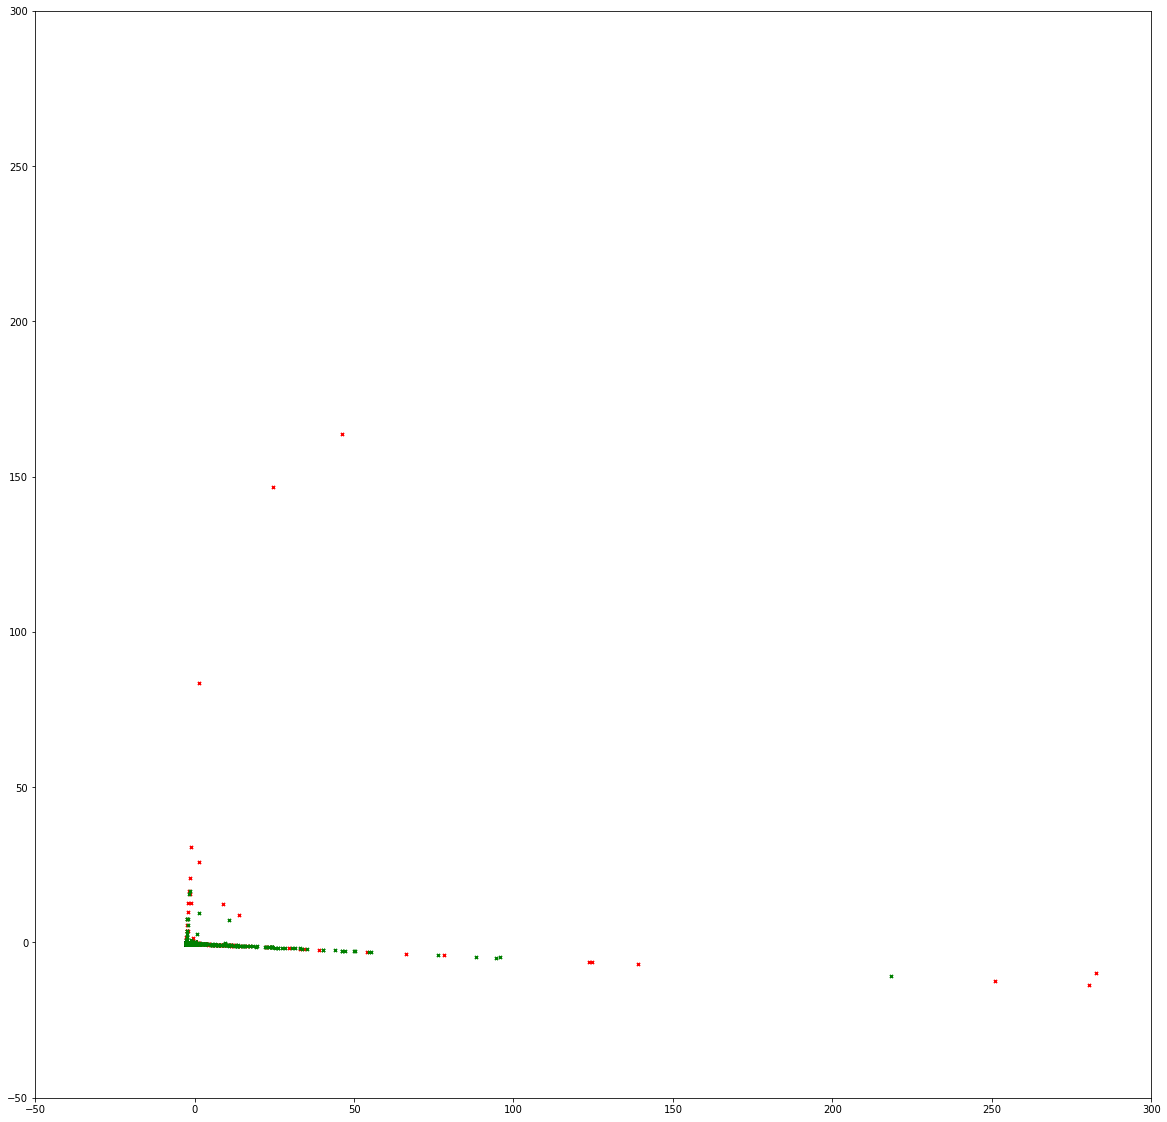

In [51]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)
ax1.scatter(pca_train[y_train == 0][:,0][:1000],pca_train[y_train == 0][:,1][:1000],s = 10,marker = 'x', c = 'red')

ax1.scatter(pca_train[y_train == 1][:,0][:1000],pca_train[y_train == 1][:,1][:1000],s = 10,marker = 'x', c = 'green')
plt.ylim(-50,300)
plt.xlim(-50,300)

plt.show()

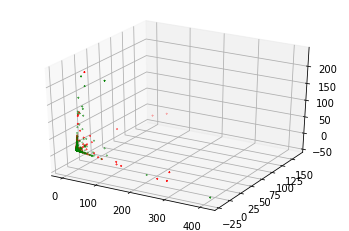

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(pca_train[y_train == 0][:,0][:1000],pca_train[y_train == 0][:,1][:1000],pca_train[y_train == 0][:,2][:1000],s = 1,marker = 'x', c = 'red')

ax1.scatter(pca_train[y_train == 1][:,0][:1000],pca_train[y_train == 1][:,1][:1000],pca_train[y_train == 1][:,2][:1000],s = 1,marker = 'x', c = 'green')

plt.show()


In [53]:
pca_logreg = LogisticRegression(random_state = 42, penalty = 'l2', class_weight = 'balanced',max_iter = 1000)
params = {'C': np.logspace(0, 4, 15),
         }

In [54]:
pca_clf = GridSearchCV(pca_logreg, 
                    params,
                    n_jobs = -1,
                    scoring = 'roc_auc', 
                    cv = 3,
                    refit = False,
                    verbose = 0,
                    return_train_score = True)

In [55]:
pca_clf.fit(pca_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 1.93069773e+00, 3.72759372e+00, 7.19685673e+00,
       1.38949549e+01, 2.68269580e+01, 5.17947468e+01, 1.00000000e+02,
       1.93069773e+02, 3.72759372e+02, 7.19685673e+02, 1.38949549e+03,
       2.68269580e+03, 5.17947468e+03, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=Fals

In [56]:
pd.DataFrame.from_dict(pca_clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.578749,0.033158,0.016258,0.000182,1,{'C': 1.0},0.630557,0.635245,0.640675,0.635493,0.004134,15,0.639243,0.636135,0.632378,0.635918,0.002807
1,0.567218,0.050385,0.018061,0.004167,1.9307,{'C': 1.93069772888325},0.630559,0.635245,0.640675,0.635493,0.004134,12,0.639245,0.636134,0.632378,0.635919,0.002808
2,0.513169,0.027142,0.015312,0.001460,3.72759,{'C': 3.72759372031494},0.630559,0.635245,0.640675,0.635493,0.004134,14,0.639244,0.636134,0.632378,0.635919,0.002807
3,0.519932,0.055386,0.014793,0.001310,7.19686,{'C': 7.196856730011519},0.630559,0.635245,0.640675,0.635493,0.004133,5,0.639246,0.636134,0.632378,0.635919,0.002808
4,0.495385,0.091131,0.014288,0.002062,13.895,{'C': 13.894954943731374},0.630559,0.635245,0.640675,0.635493,0.004134,11,0.639245,0.636134,0.632378,0.635919,0.002808


In [57]:
best_params = pca_clf.cv_results_['params'][np.argmax(pca_clf.cv_results_['mean_test_score'])]
best_params['random_state'] = 42
print("Best Params", best_params)

pca_model = LogisticRegression(**best_params, penalty = 'l2',  class_weight = 'balanced',max_iter = 500)
pca_model.fit(pca_train,y_train)

Best Params {'C': 51.7947467923121, 'random_state': 42}


LogisticRegression(C=51.7947467923121, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
pca_test = pca.transform(x_test)

In [60]:
y_hat = pca_model.predict_proba(pca_test)[:, 1]

In [61]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test, y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [62]:
precision_score(y_test, y_hat > .5)

0.365835504279866

In [63]:
accuracy_score(y_test, y_hat > .5)

0.5872666666666667

In [64]:
balanced_accuracy_score(y_test, y_hat > .5)

0.5792675360946655

In [65]:
recall_score(y_test, y_hat > .5)

0.5599863279024724

In [66]:
f1_score(y_test, y_hat > .5)

0.44255357464433637

In [67]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.628
AUPRC:0.485


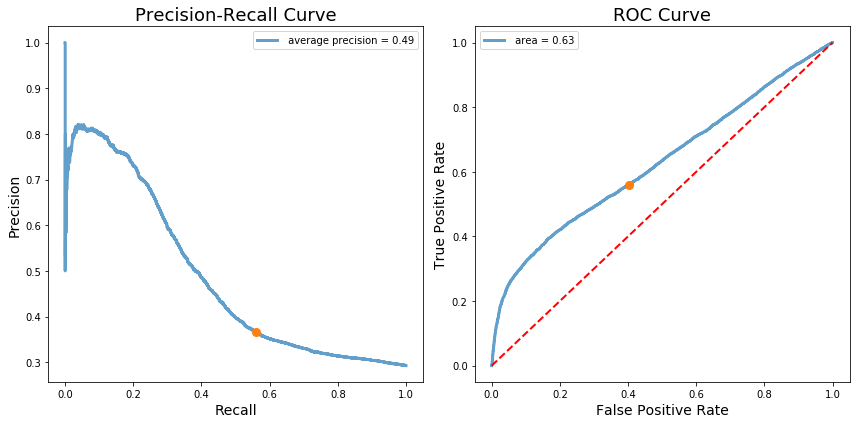

In [68]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot( recall, precision,label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot ( recall[close_default], precision[close_default],'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

# Logistic Regression Modeling L2

In [69]:
logreg = LogisticRegression(random_state = 42, penalty = 'l2', solver = 'lbfgs', class_weight = 'balanced',max_iter = 1000)
params = {'C': [0.001,.005,0.01,.008,.02],
          'penalty': ['l2'],
          'fit_intercept':[False]
         }
logreg_clf = GridSearchCV(logreg, 
                    params,
                    n_jobs = -1,
                    scoring = 'roc_auc', 
                    cv = 5,
                    refit = False,
                    verbose = 0,
                    return_train_score = True)
logreg_clf.fit(x_train.drop("STATE", axis = 1),y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.008, 0.02],
                         'fit_intercept': [False], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [70]:
pd.DataFrame.from_dict(logreg_clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.941314,0.170294,0.013339,0.000271,0.001,False,l2,"{'C': 0.001, 'fit_intercept': False, 'penalty'...",0.708484,0.716203,0.721294,0.720850,0.726861,0.718738,0.006141,5,0.722268,0.720659,0.719108,0.719366,0.717623,0.719805,0.001565
1,7.466374,0.419525,0.012458,0.000587,0.005,False,l2,"{'C': 0.005, 'fit_intercept': False, 'penalty'...",0.711497,0.720304,0.725248,0.724787,0.730175,0.722402,0.006285,4,0.726356,0.724577,0.723079,0.723168,0.721707,0.723777,0.001577
2,8.699253,0.403352,0.016969,0.004674,0.01,False,l2,"{'C': 0.01, 'fit_intercept': False, 'penalty':...",0.711998,0.721142,0.725981,0.725724,0.730777,0.723124,0.006344,2,0.727226,0.725390,0.723909,0.723919,0.722534,0.724596,0.001596
3,8.243075,0.397384,0.020340,0.003821,0.008,False,l2,"{'C': 0.008, 'fit_intercept': False, 'penalty'...",0.711892,0.720928,0.725775,0.725457,0.730617,0.722934,0.006315,3,0.727002,0.725177,0.723663,0.723721,0.722314,0.724375,0.001595
4,10.150379,0.402429,0.021503,0.007933,0.02,False,l2,"{'C': 0.02, 'fit_intercept': False, 'penalty':...",0.712231,0.721598,0.726285,0.726324,0.731109,0.723510,0.006391,1,0.727708,0.725830,0.724394,0.724327,0.722999,0.725052,0.001602


In [71]:
best_params = logreg_clf.cv_results_['params'][np.argmax(logreg_clf.cv_results_['mean_test_score'])]
best_params['random_state'] = 42
print("Best Params", best_params)

logreg = LogisticRegression(**best_params, class_weight = 'balanced',max_iter = 1000)
logreg.fit(x_train.drop("STATE", axis = 1),y_train)

Best Params {'C': 0.02, 'fit_intercept': False, 'penalty': 'l2', 'random_state': 42}


LogisticRegression(C=0.02, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predictions = logreg.predict(x_test.drop("STATE", axis = 1))

In [73]:
y_hat = [pro[1] for pro in logreg.predict_proba(x_test.drop("STATE", axis = 1))]

In [74]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[15301,  5922],
       [ 3525,  5252]])

In [75]:
balanced_accuracy_score(y_test,predictions)

0.6596726205950365

In [76]:
accuracy_score(y_test,predictions)

0.6851

In [77]:
f1_score(y_test,predictions)

0.5264899002556263

In [78]:
precision_score(y_test,predictions)

0.4700196885627349

In [79]:
recall_score(y_test,predictions)

0.5983821351258972

In [80]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_true = y_test,probas_pred = y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [81]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.720
AUPRC:0.541


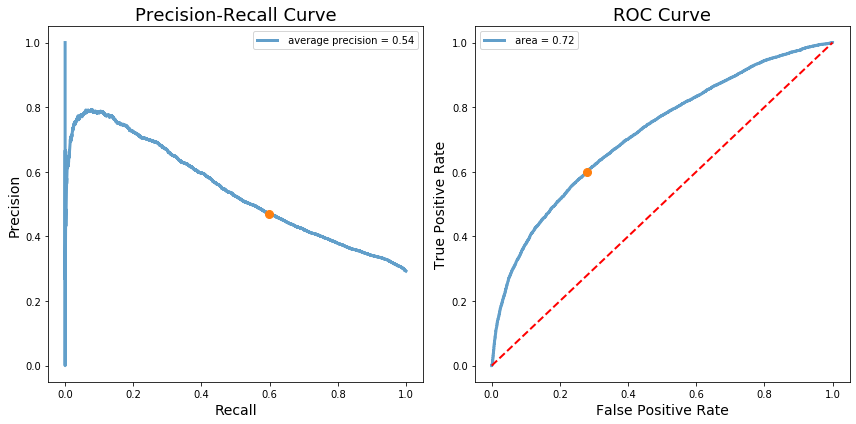

In [82]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot( recall, precision, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot ( recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [83]:
np.where(logreg.coef_ == 0)[1]

array([], dtype=int64)

In [84]:
labels = x_train.columns[np.where(logreg.coef_ != 0)[1]]
values = logreg.coef_[0][np.where(logreg.coef_ != 0)[1]]
                              

In [85]:
variable_importance = sorted(list(zip(labels,values)), key = lambda x: -np.abs(x[1]))

In [86]:
variable_importance

[('InstitutionalEmergency', 1.055503317095968),
 ('INITIAL_RX_AMOUNT_BILLED', -0.8770934454410023),
 ('Master_Form_Tablet', 0.7959930667303142),
 ('Drug_Oxycodone SA', 0.7850850757669985),
 ('Percent_bachelors_or_higher_1418', -0.729180270917916),
 ('InstitutionalElective', 0.7035642398134603),
 ('MED', 0.5015421882827444),
 ('nortryptaline_ndcs', 0.49436786847627157),
 ('init_diag_M54', 0.47634592535955184),
 ('duloxetine_ndcs', 0.41732823915208284),
 ('Drug_Hydrocodone SA', 0.36799623900499023),
 ('renal_failure', -0.35114826147814493),
 ('AGE', 0.30632937938586974),
 ('inpatient_claim', 0.3034945598119131),
 ('ambulatory_surgery_claim', -0.29056843261588616),
 ('gabapentin_ndcs', -0.27655153842350993),
 ('PRE_RX_BILLED_AVG', 0.2761187558310902),
 ('hasInstitutional', -0.248524864322268),
 ('congestive_heart_failure', 0.23361037797417314),
 ('mental_health_claim', 0.23063212605464878),
 ('InitOutpatient', -0.22725268017889844),
 ('weight_loss', 0.21670141954526292),
 ('InitPhysician'

# Logistic Regression Modeling elasticnet

In [87]:
logreg = LogisticRegression(random_state = 42, penalty = 'elasticnet', solver = 'saga', class_weight = 'balanced',max_iter = 1000)
params = {'C': [.008,.02,.2],
          'penalty': ['elasticnet'],
          'l1_ratio': [.3,.5,.7],
          'fit_intercept':[False]
         }
logreg_clf = GridSearchCV(logreg, 
                    params,
                    n_jobs = -1,
                    scoring = 'roc_auc', 
                    cv = 5,
                    refit = False,
                    verbose = 0,
                    return_train_score = True)
logreg_clf.fit(x_train.drop("STATE", axis = 1),y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=42, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.008, 0.02, 0.2], 'fit_intercept': [False],
                         'l1_ratio': [0.3, 0.5, 0.7],
                         'penalty': ['elasticnet']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [88]:
pd.DataFrame.from_dict(logreg_clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_l1_ratio,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,176.620531,0.926018,0.137744,0.015043,0.008,False,0.3,elasticnet,"{'C': 0.008, 'fit_intercept': False, 'l1_ratio...",0.707071,0.714528,0.719836,0.719083,0.725597,0.717223,0.006176,7,0.720544,0.718963,0.717452,0.717750,0.715890,0.718120,0.001558
1,174.233791,3.814696,0.164348,0.054879,0.008,False,0.5,elasticnet,"{'C': 0.008, 'fit_intercept': False, 'l1_ratio...",0.706754,0.714040,0.719457,0.718751,0.725209,0.716842,0.006166,8,0.720122,0.718542,0.717011,0.717305,0.715466,0.717689,0.001562
2,173.848226,6.916821,0.178546,0.063585,0.008,False,0.7,elasticnet,"{'C': 0.008, 'fit_intercept': False, 'l1_ratio...",0.706414,0.713507,0.719048,0.718383,0.724777,0.716426,0.006151,9,0.719691,0.718126,0.716547,0.716883,0.715006,0.717251,0.001574
3,173.633428,3.922668,0.167596,0.052177,0.02,False,0.3,elasticnet,"{'C': 0.02, 'fit_intercept': False, 'l1_ratio'...",0.707418,0.715001,0.720270,0.719448,0.725994,0.717626,0.006188,4,0.721021,0.719429,0.717919,0.718230,0.716367,0.718593,0.001558
4,169.743303,1.683011,0.178040,0.050748,0.02,False,0.5,elasticnet,"{'C': 0.02, 'fit_intercept': False, 'l1_ratio'...",0.707300,0.714848,0.720124,0.719311,0.725874,0.717491,0.006187,5,0.720862,0.719272,0.717768,0.718073,0.716204,0.718436,0.001558


In [89]:
best_params = logreg_clf.cv_results_['params'][np.argmax(logreg_clf.cv_results_['mean_test_score'])]
best_params['random_state'] = 42
print("Best Params", best_params)

logreg = LogisticRegression(**best_params, solver = 'saga', class_weight = 'balanced',max_iter = 1000)
logreg.fit(x_train.drop("STATE", axis = 1),y_train)

Best Params {'C': 0.2, 'fit_intercept': False, 'l1_ratio': 0.3, 'penalty': 'elasticnet', 'random_state': 42}


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=0.3,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=42, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [90]:
predictions = logreg.predict(x_test.drop("STATE", axis = 1))

In [91]:
y_hat = [pro[1] for pro in logreg.predict_proba(x_test.drop("STATE", axis = 1))]

In [92]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[15302,  5921],
       [ 3598,  5179]])

In [93]:
balanced_accuracy_score(y_test,predictions)

0.6555375836097085

In [94]:
accuracy_score(y_test,predictions)

0.6827

In [95]:
f1_score(y_test,predictions)

0.5211047944860895

In [96]:
precision_score(y_test,predictions)

0.4665765765765766

In [97]:
recall_score(y_test,predictions)

0.5900649424632562

In [98]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_true = y_test,probas_pred = y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [99]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.713
AUPRC:0.533


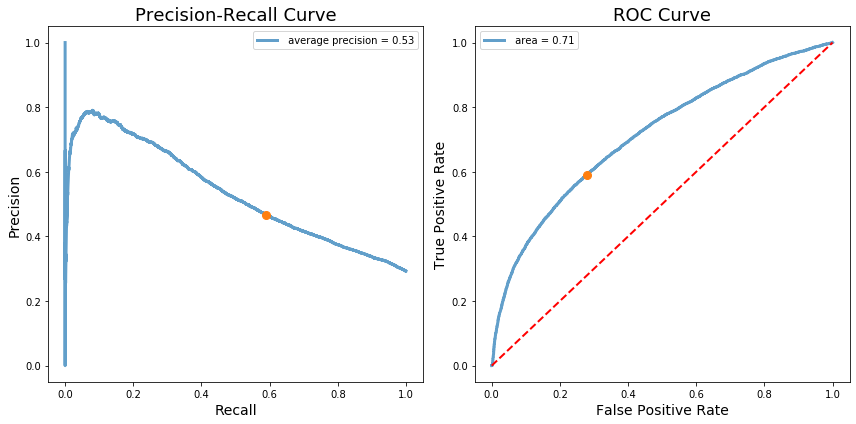

In [100]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot( recall, precision, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot ( recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [101]:
np.where(logreg.coef_ == 0)[1]

array([], dtype=int64)

In [102]:
labels = x_train.columns[np.where(logreg.coef_ != 0)[1]]
values = logreg.coef_[0][np.where(logreg.coef_ != 0)[1]]
                              

In [103]:
variable_importance = sorted(list(zip(labels,values)), key = lambda x: -np.abs(x[1]))

In [104]:
variable_importance

[('duloxetine_ndcs', 0.4056595560186785),
 ('InstitutionalEmergency', 0.3448477439361357),
 ('init_diag_M54', 0.3197179316906646),
 ('AGE', 0.31692946527466626),
 ('PRE_RX_BILLED_AVG', 0.28479882879306956),
 ('INITIAL_RX_AMOUNT_BILLED', -0.26930296804071846),
 ('InitOutpatient', -0.22558002247677308),
 ('weight_loss', 0.21628942828704897),
 ('gabapentin_ndcs', -0.21576103375634725),
 ('init_diag_Z87', 0.20193498803109036),
 ('hypertension_uncomplicated', 0.1971990569841616),
 ('renal_failure', -0.18600314540533763),
 ('Percent_bachelors_or_higher_1418', -0.1816460917476443),
 ('MED', 0.17425432287849427),
 ('ambulatory_surgery_claim', -0.16140722196746943),
 ('PRE_RX_DAYS_SUM', 0.1459393511249845),
 ('Unemployment_rate_2018', 0.14042277651253052),
 ('lidocaine_ndcs', 0.1382593234322711),
 ('TOTAL_RXS', 0.13019691875167613),
 ('obesity', 0.12507654773205723),
 ('rheumatoid_arhritis', 0.12351314740838815),
 ('hasInstitutional', -0.10489507978493691),
 ('Drug_Hydrocodone SA', 0.1034560679

# Multi layer perceptron

In [105]:
from sklearn.neural_network import MLPClassifier

In [106]:
mlp = MLPClassifier(random_state = 42)
params = {'hidden_layer_sizes': [(5,2)],
         'solver': ['sgd'],
         'learning_rate': ['invscaling','adaptive'],
         'activation': ['relu','tanh'],
         'alpha': 10.0 ** -np.arange(1, 7),
         'early_stopping': [True],
         'learning_rate_init': [.001,.0001,.005],
         'power_t': [.2,.5,.6],
         }

In [107]:
mlp_clf = GridSearchCV(mlp, 
                    params,
                    scoring = 'roc_auc',
                    n_jobs = -1,
                    cv = 2,
                    refit = False,
                    return_train_score = True)

In [108]:
mlp_clf.fit(x_train.drop("STATE", axis = 1),y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['re

In [109]:
best_params = mlp_clf.cv_results_['params'][np.argmax(mlp_clf.cv_results_['mean_test_score'])]
best_params['random_state'] = 42
print("Best Params", best_params)

mlp_model = MLPClassifier(**best_params)
mlp_model.fit(x_train.drop("STATE", axis = 1),y_train)

Best Params {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (5, 2), 'learning_rate_init': 0.005, 'solver': 'sgd', 'random_state': 42}


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [110]:
y_hat = mlp_model.predict_proba(x_test.drop("STATE", axis = 1))[:, 1]

In [111]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[15302,  5921],
       [ 3598,  5179]])

In [112]:
balanced_accuracy_score(y_test,predictions)

0.6555375836097085

In [113]:
accuracy_score(y_test,predictions)

0.6827

In [114]:
f1_score(y_test,predictions)

0.5211047944860895

In [115]:
precision_score(y_test,predictions)

0.4665765765765766

In [116]:
recall_score(y_test,predictions)

0.5900649424632562

In [117]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_true = y_test,probas_pred = y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [118]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.728
AUPRC:0.586


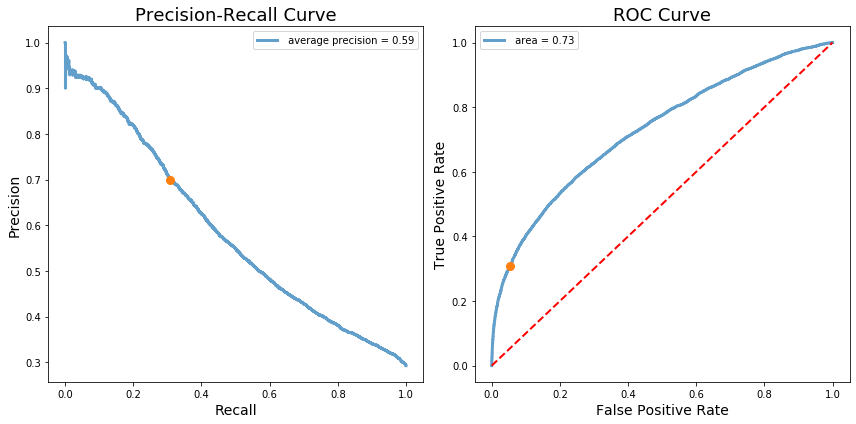

In [119]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot( recall, precision, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot ( recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

# Gradient Boosting

In [178]:
xgb = XGBClassifier(random_state = 42,subsample = .9)
params = {'clf__gamma': [i/10.0 for i in range(4)],
         'max_depth': range (2, 10, 1),
         'n_estimators': range(60, 220, 80),
         'eta': [.001,.005,.01,.015],
         'min_child_weight': [.1,1,100],
         'eval_metric': ['auc'],
         'scale_pos_weight': [1,np.sum(y_train == 0)/np.sum(y_train == 1)],
         'seed': [42]}

In [179]:
xgb_clf = GridSearchCV(xgb, 
                    params,
                    scoring = 'roc_auc', 
                    cv = 5,
                    refit = False,
                    verbose = 0,
                    return_train_score = True)

In [180]:
xgb_clf.fit(x_train.drop("STATE", axis = 1),y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=0.9, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__gamma': [0.0, 0.1, 0

In [181]:
pd.DataFrame.from_dict(xgb_clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__gamma,param_eta,param_eval_metric,param_min_child_weight,param_n_estimators,param_scale_pos_weight,param_seed,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.568368,0.127871,0.048842,0.001267,0,0.3,auc,100,60,1,42,"{'clf__gamma': 0.0, 'eta': 0.3, 'eval_metric':...",0.773516,0.775012,0.774226,0.784115,0.780048,0.777383,0.004073,13,0.808339,0.806576,0.808988,0.806373,0.808558,0.807767,0.001077
1,1.508310,0.018271,0.048093,0.000513,0,0.3,auc,100,60,2.41822,42,"{'clf__gamma': 0.0, 'eta': 0.3, 'eval_metric':...",0.781218,0.779626,0.775567,0.788748,0.781828,0.781397,0.004275,9,0.820450,0.818008,0.817851,0.818228,0.815731,0.818054,0.001498
2,3.013225,0.013191,0.051329,0.000419,0,0.3,auc,100,140,1,42,"{'clf__gamma': 0.0, 'eta': 0.3, 'eval_metric':...",0.784549,0.787454,0.787407,0.794026,0.789978,0.788683,0.003177,5,0.841171,0.841019,0.841504,0.837600,0.839948,0.840248,0.001423
3,3.109614,0.054528,0.051332,0.000539,0,0.3,auc,100,140,2.41822,42,"{'clf__gamma': 0.0, 'eta': 0.3, 'eval_metric':...",0.794632,0.794233,0.790659,0.802148,0.794258,0.795186,0.003770,1,0.857225,0.856953,0.855553,0.858326,0.859895,0.857590,0.001452
4,1.486974,0.008781,0.048184,0.000513,0.1,0.3,auc,100,60,1,42,"{'clf__gamma': 0.1, 'eta': 0.3, 'eval_metric':...",0.773516,0.775012,0.774226,0.784115,0.780048,0.777383,0.004073,13,0.808339,0.806576,0.808988,0.806373,0.808558,0.807767,0.001077


In [182]:
xgb_clf.best_score_

0.7951858383730206

In [183]:
best_params = xgb_clf.cv_results_['params'][np.argmax(xgb_clf.cv_results_['mean_test_score'])]
best_params['random_state'] = 42
print("Best Params", best_params)

xgb_model = XGBClassifier(**best_params)
xgb_model.fit(x_train.drop("STATE", axis = 1),y_train)

Best Params {'clf__gamma': 0.0, 'eta': 0.3, 'eval_metric': 'auc', 'min_child_weight': 100, 'n_estimators': 140, 'scale_pos_weight': 2.4182191078448128, 'seed': 42, 'random_state': 42}


XGBClassifier(base_score=0.5, booster=None, clf__gamma=0.0, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=100, missing=nan,
              monotone_constraints=None, n_estimators=140, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.4182191078448128,
              seed=42, subsample=1, tree_method=None, validate_parameters=False, ...)

In [184]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster=None, clf__gamma=0.0, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=100, missing=nan,
              monotone_constraints=None, n_estimators=140, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.4182191078448128,
              seed=42, subsample=1, tree_method=None, validate_parameters=False, ...)>

In [185]:
y_hat = xgb_model.predict_proba(x_test.drop("STATE", axis = 1))[:, 1]

In [186]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test, y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [187]:
precision_score(y_test, y_hat > .5)

0.5680667262436699

In [188]:
accuracy_score(y_test, y_hat > .5)

0.7531333333333333

In [189]:
balanced_accuracy_score(y_test, y_hat > .5)

0.7234254697472416

In [190]:
recall_score(y_test, y_hat > .5)

0.651817249629714

In [191]:
f1_score(y_test, y_hat > .5)

0.6070670628183361

In [192]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.804
AUPRC:0.680


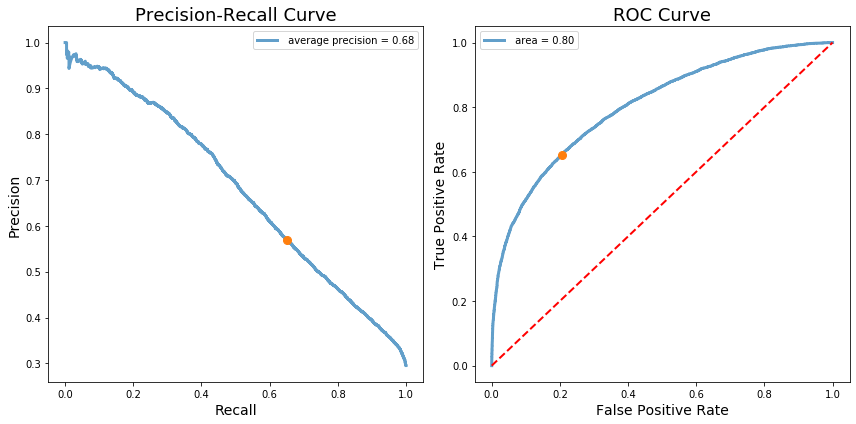

In [193]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [194]:
avg_pre

0.6798369838885465

In [195]:
predictions = xgb_model.predict(x_test.drop("STATE", axis = 1))

In [196]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[16873,  4350],
       [ 3056,  5721]])

In [198]:
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_hat, n_bins=10)


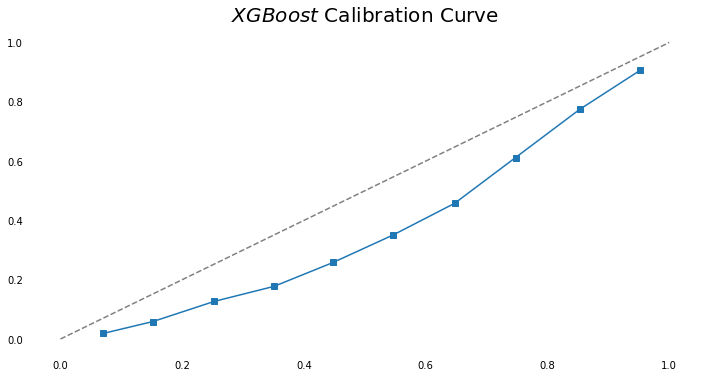

In [199]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$XGBoost$ Calibration Curve", fontsize=20); pass


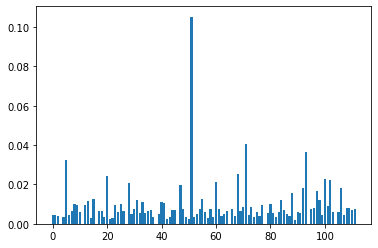

In [200]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

In [201]:
labels = x_test.drop("STATE", axis = 1).columns[np.where(xgb_model.feature_importances_)]
values = xgb_model.feature_importances_[np.where(xgb_model.feature_importances_)]
                              

In [202]:
variable_importance = sorted(list(zip(labels,values)), key = lambda x: -np.abs(x[1]))

In [ ]:
variable_importance

In [203]:
variable_importance

[('INITIAL_RX_QUANTITY', 0.10518278),
 ('init_diag_M54', 0.040728323),
 ('InstitutionalEmergency', 0.036218558),
 ('hypertension_uncomplicated', 0.03219321),
 ('InitIndipendantLab', 0.025462396),
 ('gabapentin_ndcs', 0.024436146),
 ('InstitutionalElective', 0.022715157),
 ('INITIAL_RX_LENGTH', 0.022100741),
 ('chronic_pulmonary_disease', 0.021401646),
 ('AGE', 0.020677337),
 ('Drug_Tramadol SA', 0.019833708),
 ('depression', 0.018351858),
 ('Drug_Oxycodone SA', 0.018211009),
 ('Master_Form_Tablet', 0.01662621),
 ('InstitutionalUrgent', 0.015856642),
 ('InitPhysician', 0.0126600545),
 ('emergency_room_claim', 0.012494787),
 ('INITIAL_RX_AMOUNT_PAID', 0.012045583),
 ('hasInstitutional', 0.011991951),
 ('InitPharmacy', 0.011934729),
 ('PRE_NUM_POLYPHARMACY', 0.011464108),
 ('Unemployment_rate_2018', 0.010953642),
 ('init_diag_M25', 0.010866383),
 ('ibuprofen_ndcs', 0.010606785),
 ('INITIAL_RX_AMOUNT_BILLED', 0.010298524),
 ('InitOutpatient', 0.010101149),
 ('inpatient_claim', 0.010082822)

In [204]:
labels = [variable[0] for variable in variable_importance[:20]]

In [205]:
labels

['INITIAL_RX_QUANTITY',
 'init_diag_M54',
 'InstitutionalEmergency',
 'hypertension_uncomplicated',
 'InitIndipendantLab',
 'gabapentin_ndcs',
 'InstitutionalElective',
 'INITIAL_RX_LENGTH',
 'chronic_pulmonary_disease',
 'AGE',
 'Drug_Tramadol SA',
 'depression',
 'Drug_Oxycodone SA',
 'Master_Form_Tablet',
 'InstitutionalUrgent',
 'InitPhysician',
 'emergency_room_claim',
 'INITIAL_RX_AMOUNT_PAID',
 'hasInstitutional',
 'InitPharmacy']

In [206]:
values = [variable[1] for variable in variable_importance[:20]]

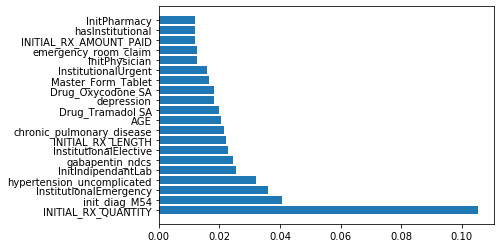

In [207]:
plt.barh(labels,values)
plt.show()

# XGBoost ROC by state

In [208]:
y_hat = xgb_model.predict_proba(x_test.loc[x_test.STATE == 1].drop("STATE", axis = 1))[:, 1]

In [209]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test.loc[x_test.STATE == 1], y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test.loc[x_test.STATE == 1], y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [210]:
precision_score(y_test.loc[x_test.STATE == 1], y_hat > .5)

0.7376362112321878

In [211]:
accuracy_score(y_test.loc[x_test.STATE == 1], y_hat > .5)

0.7709170013386881

In [212]:
balanced_accuracy_score(y_test.loc[x_test.STATE == 1], y_hat > .5)

0.7684051417823621

In [213]:
recall_score(y_test.loc[x_test.STATE == 1], y_hat > .5)

0.8599348534201955

In [214]:
f1_score(y_test.loc[x_test.STATE == 1], y_hat > .5)

0.7941043765979847

In [215]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.864
AUPRC:0.872


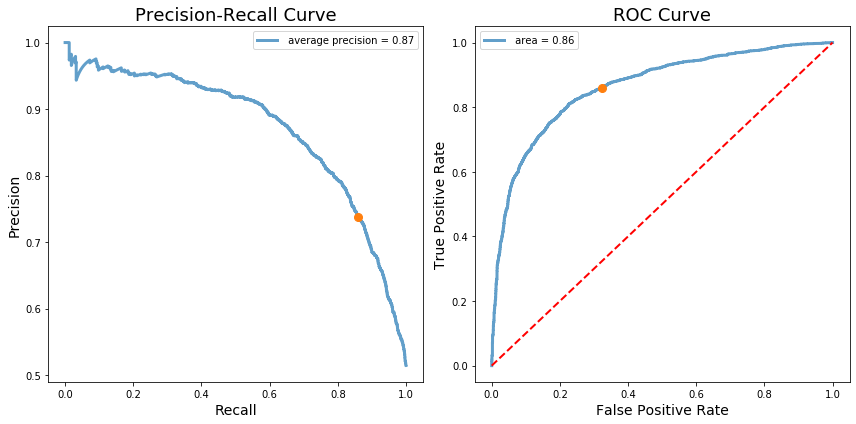

In [216]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test.loc[x_test.STATE == 1], y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test.loc[x_test.STATE == 1], y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [217]:
y_hat = xgb_model.predict_proba(x_test.loc[x_test.STATE == 3].drop("STATE", axis = 1))[:, 1]

In [218]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test.loc[x_test.STATE == 3], y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test.loc[x_test.STATE == 3], y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [219]:
precision_score(y_test.loc[x_test.STATE == 3], y_hat > .5)

0.4736070381231672

In [220]:
accuracy_score(y_test.loc[x_test.STATE == 3], y_hat > .5)

0.7465499831706496

In [221]:
balanced_accuracy_score(y_test.loc[x_test.STATE == 3], y_hat > .5)

0.6456078702173975

In [222]:
recall_score(y_test.loc[x_test.STATE == 3], y_hat > .5)

0.4504881450488145

In [223]:
f1_score(y_test.loc[x_test.STATE == 3], y_hat > .5)

0.46175839885632597

In [224]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.719
AUPRC:0.493


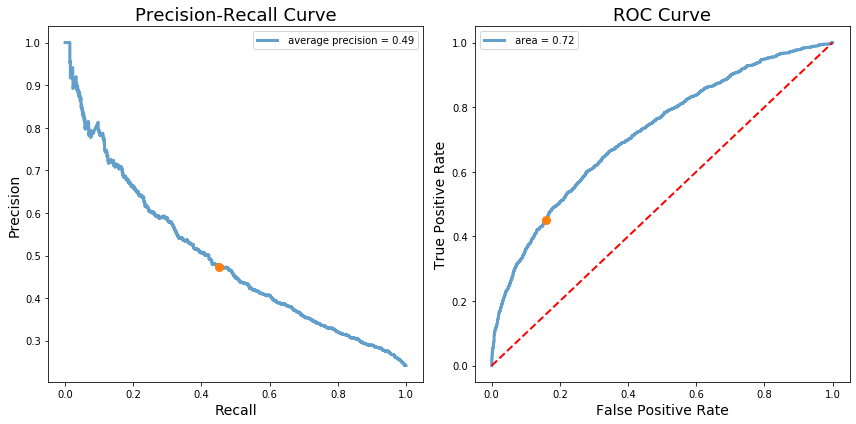

In [225]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test.loc[x_test.STATE == 3], y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test.loc[x_test.STATE == 3], y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [226]:
y_hat = xgb_model.predict_proba(x_test.loc[x_test.STATE == 4].drop("STATE", axis = 1))[:, 1]

In [227]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test.loc[x_test.STATE == 4], y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test.loc[x_test.STATE == 4], y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [228]:
precision_score(y_test.loc[x_test.STATE == 4], y_hat > .5)

0.3232169954476479

In [229]:
accuracy_score(y_test.loc[x_test.STATE == 4], y_hat > .5)

0.8620404107320305

In [230]:
balanced_accuracy_score(y_test.loc[x_test.STATE == 4], y_hat > .5)

0.6364922765722691

In [231]:
recall_score(y_test.loc[x_test.STATE == 4], y_hat > .5)

0.355

In [232]:
f1_score(y_test.loc[x_test.STATE == 4], y_hat > .5)

0.3383637807783955

In [233]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.780
AUPRC:0.282


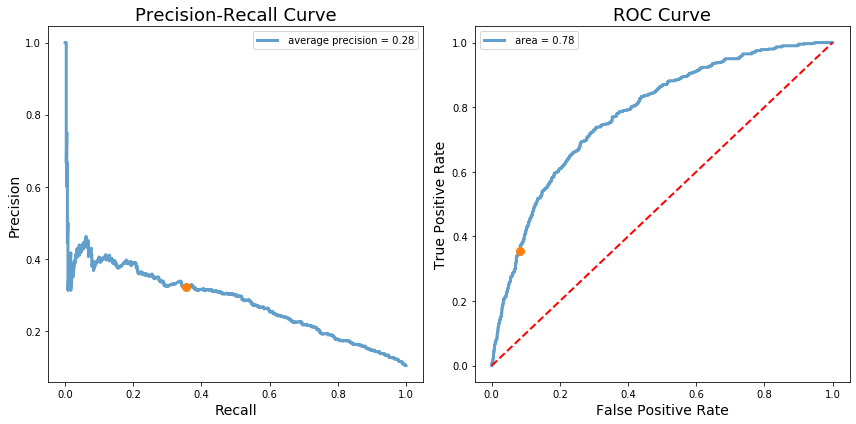

In [234]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test.loc[x_test.STATE == 4], y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test.loc[x_test.STATE == 4], y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

In [235]:
y_hat = xgb_model.predict_proba(x_test.loc[x_test.STATE == 5].drop("STATE", axis = 1))[:, 1]

In [236]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_test.loc[x_test.STATE == 5], y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test.loc[x_test.STATE == 5], y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [237]:
precision_score(y_test.loc[x_test.STATE == 5], y_hat > .5)

0.5563079116179616

In [238]:
accuracy_score(y_test.loc[x_test.STATE == 5], y_hat > .5)

0.6849925705794948

In [239]:
balanced_accuracy_score(y_test.loc[x_test.STATE == 5], y_hat > .5)

0.6885388180454853

In [240]:
recall_score(y_test.loc[x_test.STATE == 5], y_hat > .5)

0.7018884892086331

In [241]:
f1_score(y_test.loc[x_test.STATE == 5], y_hat > .5)

0.6206759443339961

In [242]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.761
AUPRC:0.676


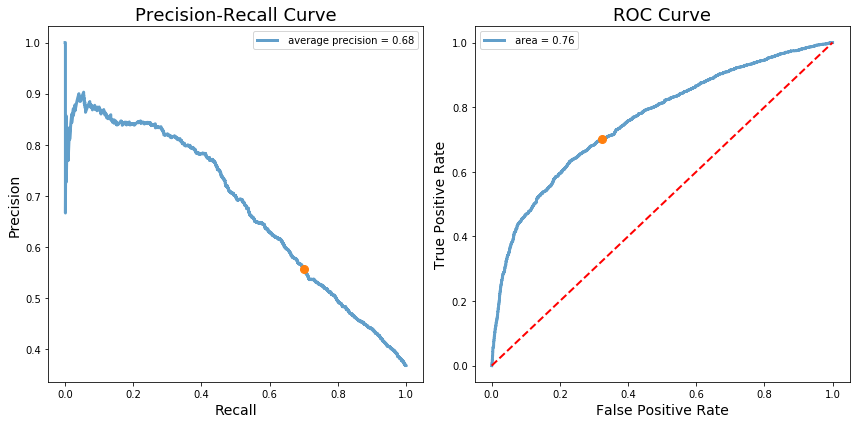

In [243]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_test.loc[x_test.STATE == 5], y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_test.loc[x_test.STATE == 5], y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 

# XGBoost validation on held out state

In [244]:
y_hat = xgb_model.predict_proba(x_val.drop("STATE", axis = 1))[:, 1]

In [245]:
precision, recall, thresholds_pr = sklearn.metrics.precision_recall_curve(y_val, y_hat)
auc_prc = sklearn.metrics.auc(recall, precision)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_val, y_hat)
auc_roc = sklearn.metrics.auc(fpr, tpr)

In [246]:
precision_score(y_val, y_hat > .5)

0.47818064397084603

In [247]:
accuracy_score(y_val, y_hat > .5)

0.6671333333333334

In [248]:
balanced_accuracy_score(y_val, y_hat > .5)

0.6343779366620212

In [249]:
recall_score(y_val, y_hat > .5)

0.5448333858929886

In [250]:
f1_score(y_val, y_hat > .5)

0.5093356918238994

In [251]:
print("AUROC:{:.3f}".format(auc_roc))
print("AUPRC:{:.3f}".format(auc_prc))

AUROC:0.688
AUPRC:0.549


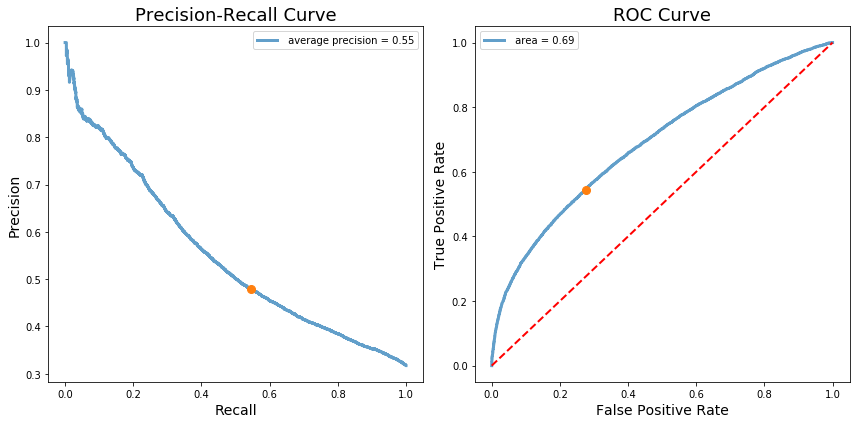

In [252]:
from sklearn.metrics import average_precision_score, roc_curve, auc

avg_pre = average_precision_score(y_val, y_hat)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
ax1.plot(recall,precision,  label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_ylabel('Precision', fontsize = 14)
ax1.set_xlabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot (recall[close_default], precision[close_default], 'o', markersize = 8)

fpr, tpr, thresholds_roc = roc_curve(y_val, y_hat)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout() 